## PREDICTIVE MODELS

After having carried out the treatment and selection of variables, the next step will correspond to the evaluation and selection of the models. As previously mentioned, this process will be carried out following two paths.

     Option 1: Not following the fraud pattern
     Option 2: Following the pattern.

#### LIBRARIES

In [82]:
import pandas as pd 
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_curve,roc_auc_score, \
                            classification_report, confusion_matrix, \
                            precision_recall_curve, precision_score, \
                            f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
import lightgbm as lgb 
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import ParameterSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score
import shap
from sklearn.inspection import partial_dependence

In [ ]:
pip install pipreqs

In [ ]:
python3 -m  pipreqs.pipreqs

#### Warnings

In [2]:
warnings.filterwarnings('ignore')

#### Functions

In [3]:
def get_models_score(classifiers, X_train, Y_train):
    
    for classifier in classifiers:

        classifier.fit(X_train, Y_train)  
        y_pred = classifier.predict(X_test)
        print(classifier)
        print("model score: %.3f" % classifier.score(X_test, Y_test))
        print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
        
def get_GLM_models_score(classifiers, X_train, Y_train):
    
    for classifier in classifiers:

        classifier.fit(X_train, Y_train)  
        print(classifier)
        print("model score: %.3f" % classifier.score(X_test, Y_test))
        
def tuning_LGBM(model, X_train, Y_train):
    
    rs_params = {
            'bagging_fraction': (0.5, 0.8),
            'bagging_frequency': (5, 8),
            'feature_fraction': (0.5, 0.8),
            'max_depth': (20, 50),
            'min_data_in_leaf': (10, 20),
            'num_leaves': (10, 100, 200),
            'n_estimators': (50, 100)
    }

    CV = RandomizedSearchCV(model, rs_params, cv=10, random_state=seed, n_jobs=2)

    CV.fit(X_train, Y_train)  
    print(CV.best_params_)    
    print(CV.best_score_)
    
def tuning_XGB(model, X_train, Y_train):
    
    params= {
            'learning_rate':[0.01, 0.1],
            'max_depth':[2,5],
            'min_child_weight':[1,3,5],
            'subsample':[.5, .7],
            'n_estimators':[100,150]
    }
    
    CV = RandomizedSearchCV(model, params, cv=10, random_state=seed, n_jobs=2)

    CV.fit(X_train, Y_train)  
    print(CV.best_params_)    
    print(CV.best_score_)

        
def get_confusion_matrix(model, X_test, Y_test):
    
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

    for title, normalize in titles_options:
        
        disp = plot_confusion_matrix(model, X_test, Y_test,

                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    
def get_model_report(Y_test, y_pred):
    
    print("Classification Report")
    print(classification_report(Y_test, y_pred))
    
def evaluate_model(ytest, ypred, ypred_proba = None):
    
    if ypred_proba is not None:
        print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, ypred_proba[:, 1])))
    print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred)))
    print('Classification report: \n{}\n'.format(classification_report(ytest, ypred)))
    print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred)))

def get_roc_curves(ytest, yhat):
    
    
    fpr, tpr, thresholds = roc_curve(ytest, yhat)
    
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='LGBM')
   
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    
    plt.show()
    
    gmeans = np.sqrt(tpr * (1-fpr))
    
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='LGBM')
    plt.scatter(fpr[ix], tpr[ix], s=100, marker='o', color='black', label='Best')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

def get_precission_recall_curve(ytest):
    
    no_skill = len(ytest[ytest==1]) / len(ytest)
    plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='LGBM')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()
    
    
    fscore = (2 * precision * recall) / (precision + recall)
    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
    no_skill = len(ytest[ytest==1]) / len(ytest)
    plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='LGBM')
    plt.scatter(recall[ix], precision[ix], s=100, marker='o', color='black', label='Best')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()
        

##### Parametrisation

In [4]:
csv_path_op1 = '../data/fraud_df_processed.csv'
csv_path_op2 = '../data/fraud_df_transformed.csv'
seed = 123456
sampling_strategy = 1
beta = 2
test_size = 0.25

##### Data

In [5]:
fraud_df_op1 = pd.read_csv(csv_path_op1, sep = ',')
fraud_df_op1 = fraud_df_op1.drop(fraud_df_op1.columns[[0]], axis=1)
fraud_df_op1

,step,type_PAYMENT,type_TRANSFER,type_CASHOUT,type_DEBIT,type_CASHIN,amount,device_MAC,device_PC,device_IPHONE,...,zone_AFRICA,zone_MISSING,user_number,user_connections,security_alert,oldbalanceDest,newbalanceDest,isFraud,Flagged_CC,Flagged_CM
0,1,1,0,0,0,0,9839.64,1,0,0,...,0,0,138,5,1,0.00,0.00,0,0,1
1,1,1,0,0,0,0,1864.28,1,0,0,...,0,0,909,1,0,0.00,0.00,0,0,1
2,1,0,1,0,0,0,181.00,0,1,0,...,0,0,2569,10,0,0.00,0.00,1,1,0
3,1,0,0,1,0,0,181.00,1,0,0,...,0,0,1787,3,0,21182.00,0.00,1,1,0
4,1,1,0,0,0,0,11668.14,1,0,0,...,0,0,3997,8,0,0.00,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,0,0,1,0,0,132557.35,1,0,0,...,0,1,3179,9,0,484329.37,616886.72,0,1,0
1048571,95,1,0,0,0,0,9917.36,1,0,0,...,1,0,2558,9,0,0.00,0.00,0,0,1
1048572,95,1,0,0,0,0,14140.05,0,1,0,...,1,0,1553,2,0,0.00,0.00,0,0,1
1048573,95,1,0,0,0,0,10020.05,1,0,0,...,0,0,642,8,0,0.00,0.00,0,0,1


In [6]:
fraud_df_op2 = pd.read_csv(csv_path_op2, sep = ',')
fraud_df_op2 = fraud_df_op2.drop(fraud_df_op2.columns[[0]], axis=1)
fraud_df_op2

,step,type_PAYMENT,type_TRANSFER,type_CASHOUT,type_DEBIT,type_CASHIN,amount,device_MAC,device_PC,device_IPHONE,...,zone_MISSING,user_number,user_connections,security_alert,oldbalanceDest,newbalanceDest,isFraud,Flagged_CC,Flagged_CM,Follows_FraudPattern
0,1,1,0,0,0,0,9839.64,1,0,0,...,0,138,5,1,0.00,0.00,0,0,1,0
1,1,1,0,0,0,0,1864.28,1,0,0,...,0,909,1,0,0.00,0.00,0,0,1,0
2,1,0,1,0,0,0,181.00,0,1,0,...,0,2569,10,0,0.00,0.00,1,1,0,1
3,1,0,0,1,0,0,181.00,1,0,0,...,0,1787,3,0,21182.00,0.00,1,1,0,1
4,1,1,0,0,0,0,11668.14,1,0,0,...,0,3997,8,0,0.00,0.00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,0,0,1,0,0,132557.35,1,0,0,...,1,3179,9,0,484329.37,616886.72,0,1,0,0
1048571,95,1,0,0,0,0,9917.36,1,0,0,...,0,2558,9,0,0.00,0.00,0,0,1,0
1048572,95,1,0,0,0,0,14140.05,0,1,0,...,0,1553,2,0,0.00,0.00,0,0,1,0
1048573,95,1,0,0,0,0,10020.05,1,0,0,...,0,642,8,0,0.00,0.00,0,0,1,0


## OPTION 1 - MODELS

Since the data set we are working with is very unbalanced with respect to the target variable, I think it is important to have balanced data that will allow us to generate models with greater precision and a higher detection rate.

Since our data set is huge, we perform subsampling to avoid heavy computational issues.

In [6]:
sampler = RandomUnderSampler(sampling_strategy = sampling_strategy, random_state = seed)

#### We separate between train and test with a ratio of 75-25

In [14]:
x = fraud_df_op1.drop('isFraud', axis = 1)
y = fraud_df_op1.isFraud

In [8]:
resampled_x, resampled_y = sampler.fit_resample(x, y)

In [9]:
resampled_x

,step,type_PAYMENT,type_TRANSFER,type_CASHOUT,type_DEBIT,type_CASHIN,amount,device_MAC,device_PC,device_IPHONE,...,zone_COUNTRY,zone_AFRICA,zone_MISSING,user_number,user_connections,security_alert,oldbalanceDest,newbalanceDest,Flagged_CC,Flagged_CM
0,41,1,0,0,0,0,11483.32,0,0,1,...,0,0,0,1902,7,0,0.00,0.00,0,1
1,15,1,0,0,0,0,3334.64,0,0,1,...,0,1,0,1775,4,1,0.00,0.00,0,1
2,21,0,0,0,0,1,34592.98,0,1,0,...,1,0,0,4405,3,0,273913.55,239320.57,1,0
3,24,1,0,0,0,0,36152.49,0,0,0,...,0,0,1,1925,1,0,0.00,0.00,0,1
4,12,0,0,1,0,0,398855.68,1,0,0,...,1,0,0,1458,2,0,1786521.84,2185377.52,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,95,0,0,1,0,0,56745.14,0,0,1,...,0,0,0,800,5,1,51433.88,108179.02,1,0
2280,95,0,1,0,0,0,33676.59,1,0,0,...,0,1,0,4804,4,0,0.00,0.00,1,0
2281,95,0,0,1,0,0,33676.59,1,0,0,...,1,0,0,1807,7,0,0.00,33676.59,1,0
2282,95,0,1,0,0,0,87999.25,0,0,0,...,0,0,1,3891,8,0,0.00,0.00,1,0


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(resampled_x, resampled_y, test_size=test_size, random_state=seed)

#### We test different models to see their score and choose

In [11]:
classifiers = [
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    xgb.XGBClassifier(),
    lgb.LGBMClassifier(),
    LogisticRegression(),
    SGDClassifier(),
    RandomForestClassifier()
    ]

get_models_score(classifiers, X_train, Y_train)
    

AdaBoostClassifier()
model score: 0.937
Accuracy: 0.9369527145359019
GradientBoostingClassifier()
model score: 0.958
Accuracy: 0.957968476357268
KNeighborsClassifier()
model score: 0.893
Accuracy: 0.8931698774080561
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
model score: 0.975
Accuracy: 0.9754816112084063
LGBMClassifier()
model

We get very good metrics on almost all models. A priori we would choose the LGBM as the model of preference.

#### SVM

I separate the svm because it normally takes much longer to execute

In [12]:
clf = svm.SVC()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

In [13]:
print("model score: %.3f" % clf.score(X_test, Y_test))
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

model score: 0.776
Accuracy: 0.7758318739054291


we obtain worse metrics with respect to the previous problems. It is ruled out.

#### GLM 

We will test 3 GLM models although we have previously tested the Stocastic Gradient Descent

In [15]:
classifiers = [
    linear_model.Ridge(),
    linear_model.Lasso(),
    linear_model.BayesianRidge(),
    ]

get_GLM_models_score(classifiers, X_train, Y_train)

Ridge()
model score: 0.597
Lasso()
model score: 0.336
BayesianRidge()
model score: 0.597


In general, much worse results. We continue with the LightGBM

### Selected Model Tuning 

The model that has given us the best results is the LightGBM. Therefore we proceed to adjust the parameters to see if we can obtain better results.

In [16]:
LGBM = lgb.LGBMClassifier()

In [17]:
tuning_LGBM(LGBM, X_train, Y_train)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
{'num_leaves': 200, 'n_estimators': 100, 'min_data_in_leaf': 10, 'max_depth': 20, 'feature_fraction': 0.8, 'bagging_frequency': 5, 'bagging_fraction': 0.8}
0.9766523867809056


It appers that with the parameters selection function we get worse results. My initial thoughts are that the score we get with the automatic model are the best results we can achieved. Lets try manually introducing them

In [18]:
LGBM = lgb.LGBMClassifier(bagging_fraction=1, bagging_frequency =1, boosting_type='gbdt', colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=20,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, num_leaves=31, min_data_in_leaf=20,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0, cv=10, random_state=seed, n_jobs=1)

LGBM.fit(X_train, Y_train)
y_pred = LGBM.predict(X_test)

print("model score: %.3f" % LGBM.score(X_test, Y_test))
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


model score: 0.982
Accuracy: 0.9824868651488616


As expected. I consider we cant achieve a better result. Lets print the model report.

In [19]:
get_model_report(Y_test, y_pred)

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       294
           1       0.98      0.99      0.98       277

    accuracy                           0.98       571
   macro avg       0.98      0.98      0.98       571
weighted avg       0.98      0.98      0.98       571



It seems that the treatment of variables and undersampling lead to good precision metrics for the model and f1. Later, we will see f2 to see how the fact of evaluating a transaction as genuine is penalized but it turns out to be a fraud. We get a good recall, since we have a high probability of predicting whether it is fraud or not. Thanks to this metric, we know that we have a high predictive power with this model for fraud, that is, we accurately predict the people who commit fraud.

Regarding the precision (we predict as fraud and they really are fraud) we obtain a very good value, so the model is very good.

However, we will have to evaluate the confusion matrix to see how it affects the worst case, but a priori it seems that we are going to have good results.

Regarding f1, since we have good values in the other two metrics, we get a good score.

### Metrics

##### Confusion matrix

Confusion matrix, without normalization
[[288   6]
 [  4 273]]
Normalized confusion matrix
[[0.97959184 0.02040816]
 [0.01444043 0.98555957]]


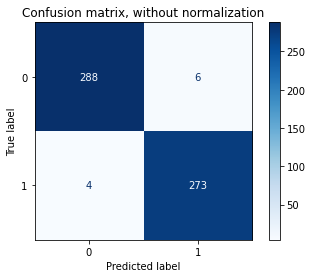

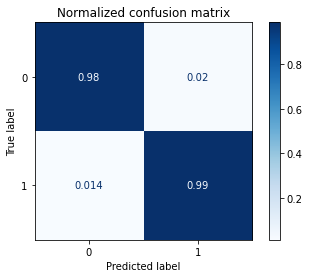

In [23]:
get_confusion_matrix(LGBM, X_test, Y_test)

According to the confusion matrix, we are getting very good results in the predictions. We have to take into consideration that the set has been under sampled, thats why we get less observations.

In the worst case (which would be that we evaluate a transaction as non-fraud, that is, a genuine transaction) but it really is a fraudulent transaction, we would be failing by 1%. In other words, we are missing 4 frauds according to the under sampling that we have done, which is not bad at all. Likewise, when we evaluate a transaction as fraud but it ends up being genuine, we would be making a 2% error. Therefore, we have good results.

In [24]:
prob_predictions = LGBM.predict_proba(X_test)

In [25]:
yhat = prob_predictions[:, 1]

#### ROC Curve

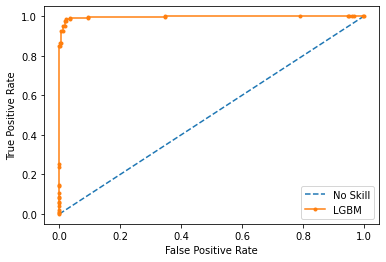

Best Threshold=0.517904, G-Mean=0.983


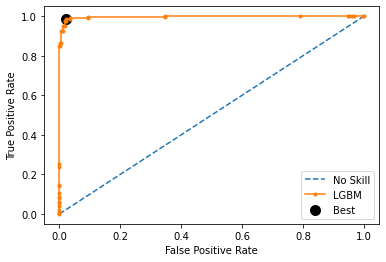

In [26]:
get_roc_curves(Y_test, yhat)

As we can see in the graph, the roc curve falls under the area at the top-left corner which indicates good performance levels. This also indicates us that our model is predicting correctly the true positives instead of falling to the right bottom corner which will lead to a bad performance model which will lead to a highly rate in predicting false positives. The second graph indicates the optimal threshold for this model which is 0.51%.

In [27]:
precision, recall, thresholds = precision_recall_curve(Y_test, yhat)

#### Precission-Recall Curve

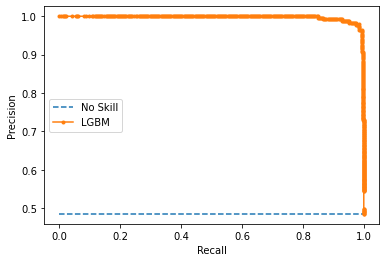

Best Threshold=0.517904, F-Score=0.982


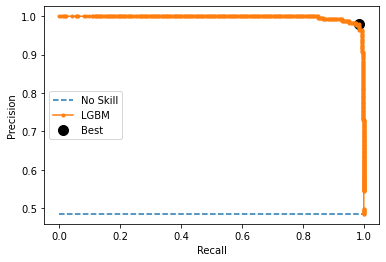

In [28]:
get_precission_recall_curve(Y_test)

In this case we got a high AUC-PR score,which is the are under the precission recall curve. This curve, as the ROC curve gives us the weighted mean of precision achieved at each threshold. The optimal threshold given by this curve hints us that we are following a correct path as it gives as the same optimal threshold.

In [29]:
score = f1_score(Y_test, y_pred)
print('F-Score: %.5f' % score)

F-Score: 0.98201


#### Cumulative gains curve

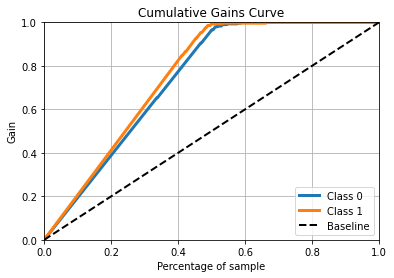

In [30]:
skplt.metrics.plot_cumulative_gain(Y_test, prob_predictions)
plt.show()

According to the cumulative curve, if we approach 20% of our transaction base (x-axis), we will get over 80% of all the fraud transactions (y-axis). With 40% of the sample we will get all the frauds detected.

#### Lift curve

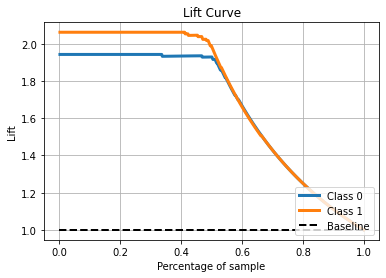

In [31]:
skplt.metrics.plot_lift_curve(Y_test, prob_predictions)
plt.show()

This curve informs us on how much better our model predicts than randomly guessing. For example, using the 10% of our best predictions, our model is about 2 times better than randomly selecting 10% from our transaction pool. 

In [33]:
fbeta_score(Y_test, y_pred, beta=beta)

0.984138428262437

In this case we are interested in knowing the F2, since it allows us to know what the penalty is when we predict that it is not fraud but it really is, in this case, the worst scenario. We established beta value as 2 to make recall value more important than a Precision one. In other words, it focuses on minimizing False Negatives than minimizing False Positives which it is what interest us. In this case, as we are correctly classifing samples(in the majority of the cases for this model),we are getting higher Precision and Recall scores which will give us a higher F-measure value.

### Next, I am going to try without balancing the data and scaling the variables.

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, stratify = y, random_state=seed)

#### We scale variables

In [16]:
scaler = StandardScaler()
model_scaled = scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

### Models

In [33]:
classifiers = [
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    xgb.XGBClassifier(),
    lgb.LGBMClassifier(),
    LogisticRegression(),
    SGDClassifier(),
    RandomForestClassifier()
    ]

get_models_score(classifiers, X_train, Y_train)
    

AdaBoostClassifier()
model score: 1.000
Accuracy: 0.9995193481445312
GradientBoostingClassifier()
model score: 1.000
Accuracy: 0.9996910095214844
KNeighborsClassifier()
model score: 0.999
Accuracy: 0.999114990234375
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
model score: 1.000
Accuracy: 0.9998092651367188
LGBMClassifier()
model

Very good results. The best the XGBoost

#### SVM

In [34]:
clf = svm.SVC()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

In [35]:
print("model score: %.3f" % clf.score(X_test, Y_test))
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

model score: 0.999
Accuracy: 0.9991683959960938


We get good values as expected. However, the a priori model to choose would correspond to the XGBoost.

#### GLM Models

In [36]:
classifiers = [
    linear_model.Ridge(),
    linear_model.Lasso(),
    linear_model.BayesianRidge(),
    ]

get_GLM_models_score(classifiers, X_train, Y_train)

Ridge()
model score: 0.133
Lasso()
model score: -0.000
BayesianRidge()
model score: 0.133


### Selected Model Tuning

In [38]:
XGB = xgb.XGBClassifier()

In [41]:
tuning_XGB(XGB, X_train, Y_train)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject

KeyboardInterrupt



As expected, due to the nature of the dataset(large dataset) the requiered computing power and time exceeds my capacities. Since it takes to much time, I will try to manually perform the model instead of trying several values for the different parameters.

In [17]:
XGB = xgb.XGBClassifier(base_score=0.5, learning_rate=0.3, booster='gbtree', max_depth=6,
                         min_child_weight=3, n_estimators=100, 
                        subsample=0.5,verbose=1, cv=10, random_state=seed, n_jobs=1)

XGB.fit(X_train, Y_train)
y_pred = XGB.predict(X_test)

print("model score: %.3f" % XGB.score(X_test, Y_test))
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

[19:40:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "cv", "verbose" } are not used.

model score: 1.000
Accuracy: 0.9997940063476562


We get a slighly better sceneraio with this tuning. Lets print the model report. 

In [18]:
get_model_report(Y_test, y_pred)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    261858
           1       0.98      0.83      0.90       286

    accuracy                           1.00    262144
   macro avg       0.99      0.91      0.95    262144
weighted avg       1.00      1.00      1.00    262144



Recall has slightly been reduced compared to the under sampled case. Lets see the confusion matrix to see if the target variable is correctly predicted.

Confusion matrix, without normalization
[[261854      4]
 [    50    236]]
Normalized confusion matrix
[[9.99984725e-01 1.52754546e-05]
 [1.74825175e-01 8.25174825e-01]]


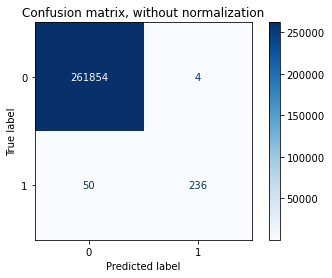

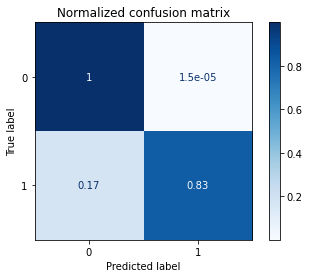

In [20]:
get_confusion_matrix(XGB, X_test, Y_test)

Despite the fact that now we are working with the complete dataset, fraud transactions are correctly predicted. In the worst scenario (Predicted 0 - True 1) we are missing just 50 case. This is impressive. In the least worst scenario ( Predicted 1 - True 0) we are missing 5, which taking into consideration the dimensions of the dataset is quite impressive.Better results overall compared to previous confusion matrix in this cases.However, we get a decrease in predicting frauds. Lets see the curves. 

In [21]:
prob_predictions = XGB.predict_proba(X_test)

In [22]:
yhat = prob_predictions[:, 1]

#### ROC Curve

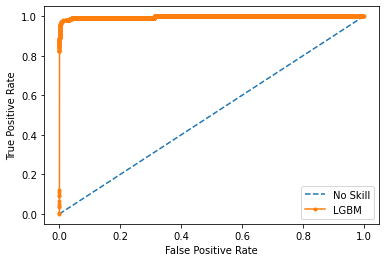

Best Threshold=0.001639, G-Mean=0.984


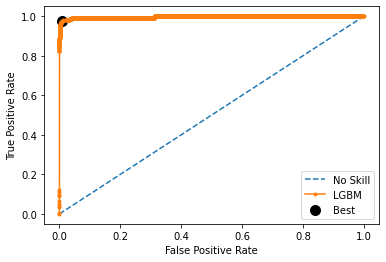

In [23]:
get_roc_curves(Y_test, yhat)

#### Precission-Recall Function

In [26]:
precision, recall, thresholds = precision_recall_curve(Y_test, yhat)

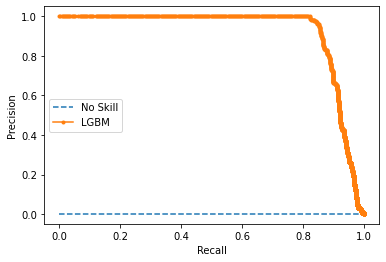

Best Threshold=0.446729, F-Score=0.905


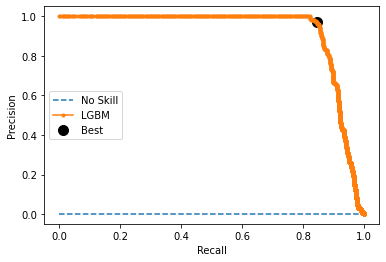

In [27]:
get_precission_recall_curve(Y_test)

#### Cumulative Gain Curve

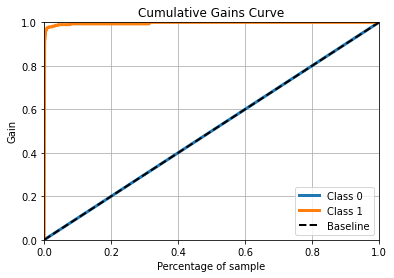

In [28]:
skplt.metrics.plot_cumulative_gain(Y_test, prob_predictions)
plt.show()

#### Lift Curve

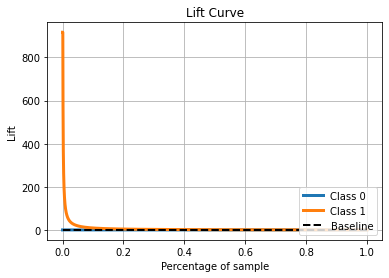

In [29]:
skplt.metrics.plot_lift_curve(Y_test, prob_predictions)
plt.show()

In [30]:
fbeta_score(Y_test, y_pred, beta=beta)

0.8526011560693642

We get a slighly worse F2 score compared to previous selected model (LGBM). Additionally, taking into account the results obtained with the confusion matrix and the curves, this model is not preferable as we are predicting incorrectly more false negatives.

## Option 2 - Models

Lets see how the models work with the dataframe containing the fraud pattern.

In [31]:
x = fraud_df_op2.drop('isFraud', axis = 1)
y = fraud_df_op2.isFraud

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed, stratify = y)

In [61]:
classifiers = [
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    xgb.XGBClassifier(),
    lgb.LGBMClassifier(),
    LogisticRegression(),
    SGDClassifier(),
    RandomForestClassifier()
    ]

get_models_score(classifiers, X_train, Y_train)

AdaBoostClassifier()
model score: 1.000
Accuracy: 0.9999771118164062
GradientBoostingClassifier()
model score: 1.000
Accuracy: 0.9999732971191406
KNeighborsClassifier()
model score: 0.999
Accuracy: 0.9993095397949219
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
model score: 1.000
Accuracy: 0.9999809265136719
LGBMClassifier()
mode

As expected with the fraud pattern, predictions are very clear for the different models. Lets try SVM and GLM models, but if we get worse results i will try RandomForest as the results are equally to XGBC.

#### GLM Models

In [10]:
classifiers = [
    linear_model.Ridge(),
    linear_model.Lasso(),
    linear_model.BayesianRidge(),
    ]

get_GLM_models_score(classifiers, X_train, Y_train)

Ridge()
model score: 0.979
Lasso()
model score: 0.105
BayesianRidge()
model score: 0.979


Lets use as the selected model : RandomForest.

In [13]:
rf = RandomForestClassifier()

In [39]:
rf = RandomForestClassifier(n_estimators=100, max_features='auto', 
                            max_depth=6, criterion='gini',
                            random_state=seed, n_jobs=1)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)

print("model score: %.3f" % rf.score(X_test, Y_test))
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

model score: 1.000
Accuracy: 0.9999809265136719


it seems score can be exceeded. That is the best configuration. As I said previously the selection of variables and EDA has allowed us to perfectly detect the fraud, leading to automatic models having the better score. 

In [40]:
get_model_report(Y_test, y_pred)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    261858
           1       1.00      0.98      0.99       286

    accuracy                           1.00    262144
   macro avg       1.00      0.99      1.00    262144
weighted avg       1.00      1.00      1.00    262144



Confusion matrix, without normalization
[[261858      0]
 [     5    281]]
Normalized confusion matrix
[[1.         0.        ]
 [0.01748252 0.98251748]]


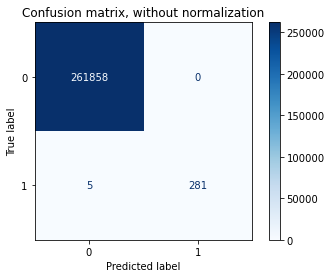

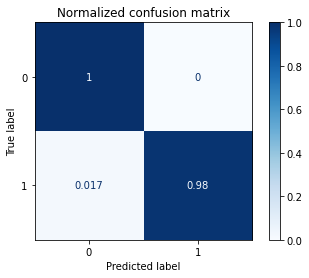

In [42]:
get_confusion_matrix(rf, X_test, Y_test)

As I clearly expected the model detects the fraud pattern perfectly leading to a very predictive model towards fraud. Just 5 cases are incorrectly predicted in the worst case.

In [44]:
prob_predictions = rf.predict_proba(X_test)

In [45]:
yhat = prob_predictions[:, 1]

#### ROC Curve

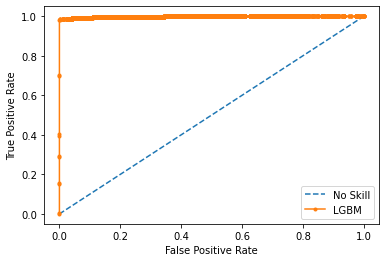

Best Threshold=0.014604, G-Mean=0.993


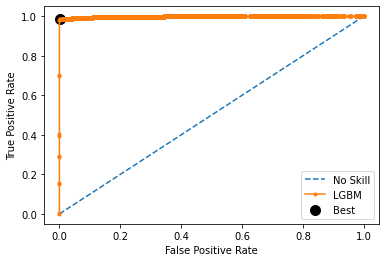

In [46]:
get_roc_curves(Y_test, yhat)

#### Precission-Recall curve

In [47]:
precision, recall, thresholds = precision_recall_curve(Y_test, yhat)

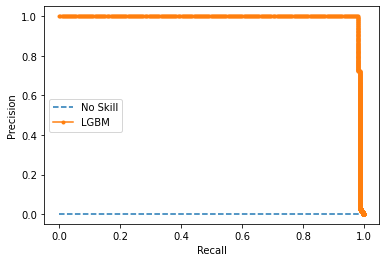

Best Threshold=0.650383, F-Score=0.991


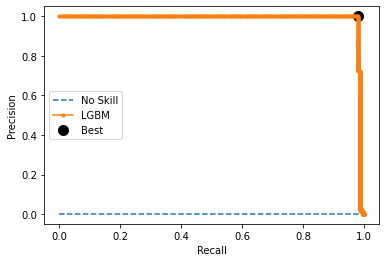

In [48]:
get_precission_recall_curve(Y_test)

#### Cumulative gain curve

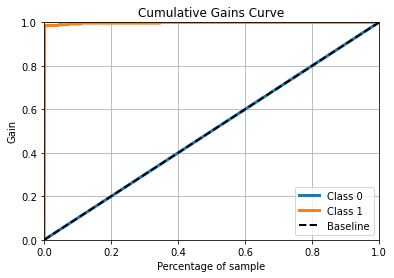

In [49]:
skplt.metrics.plot_cumulative_gain(Y_test, prob_predictions)
plt.show()

#### lift Curve

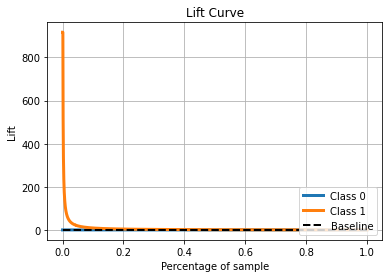

In [50]:
skplt.metrics.plot_lift_curve(Y_test, prob_predictions)
plt.show()

As we can see from the curves, following the fraud pattern clearlt allows the model to easily detect frauds. We can grasp from the lift curve that our model just with 10% of the sample is way better than randomly predicting the output.

In [51]:
fbeta_score(Y_test, y_pred, beta=beta)

0.9859649122807017

In [ ]:
We get a very decent f2 score, therefore we are predicting correctly

All the metrics clearly tell us that this is the most model aswell as the best approach. We will conduct the SHAP model to see the interpretability of this model. 

## INTERPRETABILITY 

In [62]:
X_test

,step,type_PAYMENT,type_TRANSFER,type_CASHOUT,type_DEBIT,type_CASHIN,amount,device_MAC,device_PC,device_IPHONE,...,zone_AFRICA,zone_MISSING,user_number,user_connections,security_alert,oldbalanceDest,newbalanceDest,Flagged_CC,Flagged_CM,Follows_FraudPattern
715789,37,1,0,0,0,0,3634.25,0,0,0,...,1,0,1678,2,0,0.00,0.00,0,1,0
782441,39,1,0,0,0,0,19022.88,0,0,1,...,0,0,3461,9,1,0.00,0.00,0,1,0
45213,9,0,1,0,0,0,1486916.41,0,1,0,...,0,0,4961,5,0,616685.98,2103602.39,1,0,0
295126,15,0,0,1,0,0,11011.59,0,0,1,...,0,0,1913,7,0,610327.02,621338.61,1,0,0
975143,44,0,0,1,0,0,132125.61,0,1,0,...,1,0,1088,9,0,274318.52,406444.13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964211,44,0,0,0,0,1,168543.59,1,0,0,...,1,0,258,6,0,690070.22,521526.63,1,0,0
707080,37,0,0,1,0,0,81298.47,1,0,0,...,0,1,2410,8,0,103880.14,185178.60,1,0,0
578745,33,0,0,0,0,1,189149.07,0,0,0,...,0,0,2731,2,0,3026499.72,2837350.65,1,0,0
797217,40,1,0,0,0,0,2118.28,1,0,0,...,0,0,1112,6,0,0.00,0.00,0,1,0


In [63]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

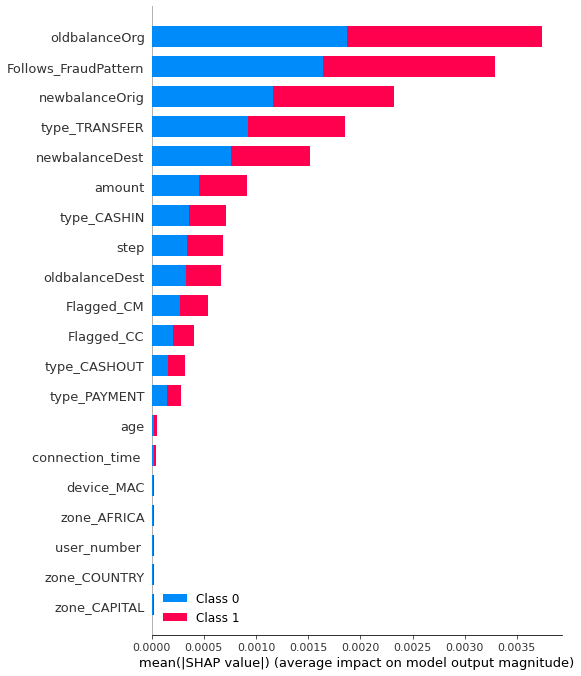

In [64]:
shap.summary_plot(shap_values, X_test) 

Here we can see an ordered display of the variables by importance, oldbalance and fraudpattern variables are organised as the most important as expected and zone and device variables as the least. As we where predicting during the EDA analysis this variables where not relevant.

#### Summary plot - Global model interpretability: 

To see the relationship of all the variables with the model, and the impact they have. With this graph we see the SHAP value of each feature in the training set. 

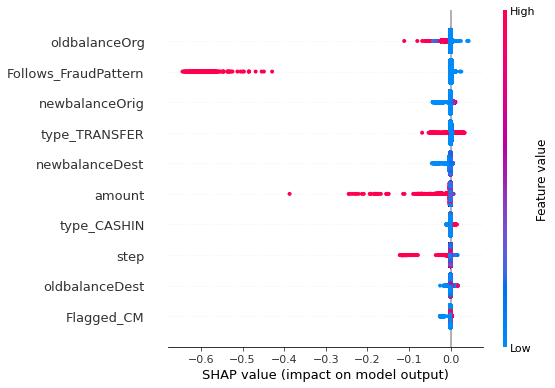

In [69]:
shap.summary_plot(shap_values[0], features=X_test, max_display=10)

Global model interpretability: We can see on the left axis ordered based on importance from top to bottom that oldbalanceOrg and Follows_FraudPattern variables are the moost important. I expected the fraud pattern to be the most important as for the order presented by the summary plot. However, it is evidently that oldbalance follows_fraudpattern and newbalanceorig are correlated, thus becoming the most important variables. In spite of this fact, we can see how if the fraudpattern has a high value (in this case I suppose 1 is the high value) it increases the probability of predicting a transaction as fraudulent. As mentioned earlier this is the one of the most important variables in our model, if not the most. As we cleared out in the EDA analysis this dataset contains a clear fraud pattern which allows to predict fraud easily. Apparently, having a higher value in the amount variable also increases the probability of evaluating a transaction as fraud, case which I did not contemplate in the EDA. 

## FINAL CONCLUSIONS

My final conclusion about this dataset is that:
    
    1- The data that we are working with is probably synthetic dataset as fraud clearly follows a pattern. Transactions from client to client leaving to then proceed to perform a cashout of the same amount. 
    
    2- During the elaboration of the model I have seriously considered whether to use the fraud pattern as a variable or not. At first I thought it would be better to let the model have more freedom to get better predictive power. However, the data is this and we have to work with it. If this were a real case, the pattern of fraud committed is very clear and therefore it has to be predicted as accurately as possible.
    
    3- We got evidently better results with the fraud patter dataframe, and scalling. Did not have computing power to conduct a over sampling an evaluate the results. However I am very satisfied with the model performance obtained.
    
    4- If people who commit fraud discover this pattern I believe the model will get worst results. However, thats the reason why I explored the scenario without the pattern and still get very good performance. 